# k近邻算法

* 思想极度简单
* 应用数学知识少
* 效果好
* 可以解释机器学习算法使用过程中的很多细节问题
* 更完整的刻画机器学习应用的流程

## kNN基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211,2.331273381],
             [3.110073483,1.781539638],
             [1.343808831,3.368360954],
             [3.582294042,4.679179110],
             [2.280362439,2.866990263],
             [7.423436942,4.696522875],
             [5.745051997,3.533989803],
             [9.172168622,2.511101045],
             [7.792783481,3.424088941],
             [7.939820817,0.791637231]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

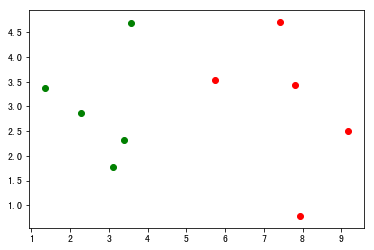

In [6]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.show()

In [7]:
x = np.array([8.03607318,3.365731514])

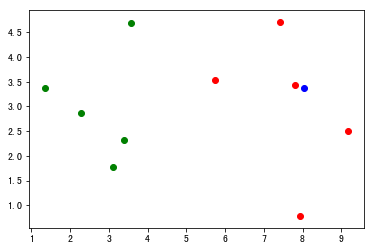

In [8]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程

In [9]:
from math import sqrt

distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train  - x)**2))
    distances.append(d)

In [10]:
distances

[4.7563936961412665,
 5.174469723056508,
 6.6922648655631605,
 4.643413959310779,
 5.777278682001746,
 1.4650354284531912,
 2.297191527228831,
 1.421656108866111,
 0.2501908609953036,
 2.5758932227785314]

In [11]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [12]:
nearest = np.argsort(distances)

In [13]:
k = 6

In [14]:
topK_y = [y_train[i] for i in nearest[:k]]

In [15]:
topK_y

[1, 1, 1, 1, 1, 0]

In [16]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [17]:
votes = Counter(topK_y)

In [18]:
votes

Counter({1: 5, 0: 1})

In [19]:
type(votes)

collections.Counter

In [20]:
votes.most_common(1)

[(1, 5)]

In [21]:
votes.most_common(1)[0][0]

1

In [22]:
predict_y = votes.most_common(1)[0][0]

In [23]:
predict_y

1

## 使用scikit-learn中的kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [26]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [27]:
kNN_classifier.predict(x.reshape(1,-1))

array([1])

In [28]:
y_predict = kNN_classifier.predict(x.reshape(1,-1))

In [29]:
y_predict[0]

1

## 改写自己的kNN

In [30]:
from math import sqrt
class KNNClassifier:
    
    def __init__(self, k):
        '''初始化kNN分类器'''
        assert k >= 1, 'k must be valid'
        self.k = k
        self._X_train = None
        self._y_train = None
        
    def fit(self, X_train, y_train):
        '''根据训练集X_train和y_train训练kNN分类器'''
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predict(self, X_predict):
        y_predict = [self._predict(x) for x in X_predict]
        return y_predict
    
    def _predict(self, x):
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)
        topK_y = [self._y_train[i] for i in nearest[:,self.k]]
        wotes=Counter(topK_y)
        return votes.most_common(1)[0][0]

## 测试我们的算法

In [31]:
from sklearn import datasets

In [32]:
iris = datasets.load_iris()

In [33]:
X = iris.data
y = iris.target

In [34]:
X.shape

(150, 4)

In [35]:
y.shape

(150,)

### train_test_split

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
shuffle_indexes = np.random.permutation(len(X))

In [38]:
shuffle_indexes

array([113,  80,  50,  99,  29,  59,  83,  68, 109, 112, 135,  27,  71,
        14,   0,  81, 132,  49,  36,   2, 123,  87,  65,  46,  55,  63,
         4, 100, 143,  16,   8,  12,  30,  43,  93,  79,  51,  85, 106,
        74,  70,  24, 139,  34,  84, 129, 127, 144, 102, 128, 140,  72,
        18,  76,  58,  32, 137, 122,  31,   6,  94, 126, 136,  13,  37,
        25,  40, 103, 111,  15, 141,  69, 145,  64,  48,  23,  44, 147,
         5,  95,  42,  86,  66,  62, 148, 117, 138,  57,  56,  82,  20,
       101,  96,  19,  41,  89, 125,   7, 120, 107,  78,  22, 105,   1,
       108, 134, 142, 115,  35, 131,  90,  33,  91,  17, 121,  60,  67,
        54,  92, 114, 110, 130,  88,  98, 146,  45,  77,  47, 119, 149,
        61,  26,  10,  38, 104,  75,  73,  21,  11, 118,  28, 116, 124,
        39, 133,   3,  97,   9,  52,  53])

In [39]:
test_radio = 0.2
test_size = int(len(X) * test_radio)

In [40]:
test_size

30

In [41]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]
train_indexes

array([  8,  12,  30,  43,  93,  79,  51,  85, 106,  74,  70,  24, 139,
        34,  84, 129, 127, 144, 102, 128, 140,  72,  18,  76,  58,  32,
       137, 122,  31,   6,  94, 126, 136,  13,  37,  25,  40, 103, 111,
        15, 141,  69, 145,  64,  48,  23,  44, 147,   5,  95,  42,  86,
        66,  62, 148, 117, 138,  57,  56,  82,  20, 101,  96,  19,  41,
        89, 125,   7, 120, 107,  78,  22, 105,   1, 108, 134, 142, 115,
        35, 131,  90,  33,  91,  17, 121,  60,  67,  54,  92, 114, 110,
       130,  88,  98, 146,  45,  77,  47, 119, 149,  61,  26,  10,  38,
       104,  75,  73,  21,  11, 118,  28, 116, 124,  39, 133,   3,  97,
         9,  52,  53])

In [42]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [43]:
X_train.shape

(120, 4)

In [44]:
y_train.shape

(120,)

In [45]:
X_test.shape

(30, 4)

In [46]:
y_test.shape

(30,)

## 使用我们的算法

In [47]:
from playML.model_selection import train_test_split
from sklearn.datasets import load_iris

In [48]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

30


In [49]:
X_train.shape

(120, 4)

In [50]:
X_test.shape

(30, 4)

In [51]:
from playML.KNN import KNNClassifier

In [52]:
my_knn_clf = KNNClassifier(k=3)

In [53]:
my_knn_clf.fit(X_train=X_train, y_train=y_train)

KNN(k=3)

In [54]:
y_predict = my_knn_clf.predict(X_test)

In [55]:
y_predict

array([1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 1, 1, 0, 1])

In [56]:
y_test

array([1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 1, 1, 0, 1])

In [57]:
sum(y_predict == y_test)

30

In [58]:
# 准确率
sum(y_predict == y_test) / len(y_test)

1.0

### sklearn中的train_test_split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [62]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


## 分类准确度

In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import  datasets

In [64]:
digits = datasets.load_digits()

In [65]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [66]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [67]:
digits.data.shape

(1797, 64)

In [68]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [69]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
y = digits.target

In [71]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [72]:
X = digits.data
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [73]:
some_digit = X[666]

In [74]:
y[666]

0

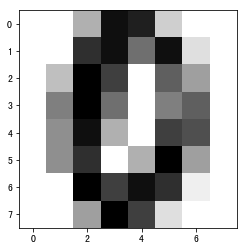

In [75]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [76]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_radio=0.2)

359


In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1438, 64) (359, 64) (1438,) (359,)


In [78]:
from playML.KNN import KNNClassifier

In [79]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [80]:
y_predict = my_knn_clf.predict(X_test)

In [81]:
y_predict

array([4, 1, 1, 1, 6, 3, 0, 7, 3, 0, 0, 8, 5, 2, 0, 3, 3, 5, 8, 4, 9, 8,
       1, 7, 0, 1, 0, 3, 3, 9, 2, 6, 8, 0, 3, 3, 9, 5, 8, 4, 8, 1, 3, 8,
       8, 0, 4, 5, 2, 3, 7, 0, 2, 5, 1, 4, 0, 2, 6, 6, 1, 8, 6, 1, 3, 4,
       7, 2, 2, 2, 5, 4, 8, 1, 7, 5, 4, 1, 6, 8, 0, 7, 7, 8, 4, 9, 5, 0,
       7, 3, 5, 6, 1, 3, 7, 7, 9, 7, 1, 0, 1, 5, 1, 7, 9, 4, 7, 1, 2, 2,
       6, 7, 3, 5, 7, 6, 7, 6, 0, 2, 2, 8, 3, 8, 8, 5, 7, 9, 7, 8, 0, 4,
       5, 8, 5, 6, 1, 9, 8, 6, 9, 0, 2, 6, 5, 0, 4, 9, 1, 7, 5, 9, 6, 6,
       6, 1, 0, 5, 9, 6, 3, 0, 9, 2, 0, 6, 8, 1, 1, 3, 6, 2, 7, 2, 1, 4,
       5, 9, 1, 9, 3, 9, 0, 8, 5, 4, 1, 0, 8, 6, 4, 7, 0, 7, 9, 0, 6, 3,
       2, 9, 2, 6, 6, 3, 7, 6, 9, 2, 7, 9, 8, 7, 0, 3, 9, 3, 2, 5, 3, 4,
       7, 8, 5, 4, 5, 8, 8, 2, 2, 7, 7, 6, 5, 3, 5, 0, 2, 6, 0, 5, 1, 4,
       4, 5, 0, 5, 0, 6, 6, 4, 6, 0, 5, 5, 4, 5, 9, 2, 4, 6, 7, 3, 5, 1,
       0, 7, 2, 0, 4, 9, 0, 9, 8, 4, 4, 9, 3, 9, 8, 4, 9, 0, 5, 1, 9, 0,
       5, 7, 5, 2, 3, 6, 4, 3, 6, 7, 6, 5, 6, 0, 6,

In [82]:
sum(y_predict == y_test) / len(y_test)

0.9860724233983287

In [83]:
from playML.metrics import accuracy_score

In [84]:
accuracy_score(y_test, y_predict)

0.9860724233983287

### scikit-learn中的accuracy_score

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [86]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [87]:
from sklearn.neighbors import  KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [88]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [89]:
y_predict = knn_clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

## 超参数

### 寻找最好的k

In [91]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k =", best_k)
print("best_score =", best_score)

best_k = 4
best_score = 0.9916666666666667


### 考虑距离? 不考虑距离?

In [93]:
best_method = ''
best_score = 0.0
best_k = -1
for method in ['uniform', 'distance']:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
        
print("best_k =", best_k)
print("best_score =", best_score)
print("best_method =", best_method)

best_k = 4
best_score = 0.9916666666666667
best_method = uniform


### 搜索明可夫斯基距离对应的p

In [95]:
%%time
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
        
print("best_k =", best_k)
print("best_score =", best_score)
print("best_p =", best_p)

best_k = 3
best_score = 0.9888888888888889
best_p = 2
CPU times: user 17.9 s, sys: 120 ms, total: 18 s
Wall time: 19.1 s


### 网格搜索
### Grid Search

In [110]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [99]:
knn_clf = KNeighborsClassifier()

In [100]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [101]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 2min 23s, sys: 1.18 s, total: 2min 24s
Wall time: 2min 33s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [103]:
grid_search.best_score_

0.9853862212943633

In [104]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [105]:
knn_clf = grid_search.best_estimator_

In [106]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [108]:
knn_clf.score(X_test, y_test)

0.9833333333333333

In [111]:
# n_jobs 几核 verbose 搜索信息
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   1.3s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   1.4s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   1.6s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   1.6s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   1.5s
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.0s


[CV] .................. n_neighbors=10, weights=uniform, total=   1.7s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.6s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] .................. n_neighbors=10, weights=uniform, total=   1.9s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] .................. n_neighbors=10, weights=uniform, total=   1.8s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.6s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.4s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   1.2s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   0.9s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.3s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.3s
[CV] n_neighbors=9, p=3, weights=distance ............................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min


[CV] ............. n_neighbors=8, p=5, weights=distance, total=   2.4s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   2.1s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   2.3s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   2.1s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   2.1s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   1.6s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   1.8s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] .

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

## 数据归一化处理

### 最值归一化 Normalization

In [112]:
x = np.random.randint(0, 100, size=100)
x

array([94, 13, 81, 73, 62, 86, 22, 38, 48, 66, 54, 77, 65, 43, 41, 21, 94,
       92, 17, 36, 82, 11, 98, 63, 60, 92, 70, 46, 14, 88, 24, 95, 72, 72,
       40,  6, 11, 79, 86, 70, 14, 65, 56, 21,  9, 63, 91,  3, 82, 48, 39,
       36, 36, 36, 84, 95, 56, 53,  3, 86, 92, 25, 23, 82, 64, 13,  6, 25,
       18, 23, 95,  7, 50, 23, 72, 66, 60,  4, 17, 68, 13, 62, 80, 31, 63,
       67, 21, 56, 84, 21, 89, 22, 53, 34, 51,  9, 32, 39,  6, 85])

In [113]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.95789474, 0.10526316, 0.82105263, 0.73684211, 0.62105263,
       0.87368421, 0.2       , 0.36842105, 0.47368421, 0.66315789,
       0.53684211, 0.77894737, 0.65263158, 0.42105263, 0.4       ,
       0.18947368, 0.95789474, 0.93684211, 0.14736842, 0.34736842,
       0.83157895, 0.08421053, 1.        , 0.63157895, 0.6       ,
       0.93684211, 0.70526316, 0.45263158, 0.11578947, 0.89473684,
       0.22105263, 0.96842105, 0.72631579, 0.72631579, 0.38947368,
       0.03157895, 0.08421053, 0.8       , 0.87368421, 0.70526316,
       0.11578947, 0.65263158, 0.55789474, 0.18947368, 0.06315789,
       0.63157895, 0.92631579, 0.        , 0.83157895, 0.47368421,
       0.37894737, 0.34736842, 0.34736842, 0.34736842, 0.85263158,
       0.96842105, 0.55789474, 0.52631579, 0.        , 0.87368421,
       0.93684211, 0.23157895, 0.21052632, 0.83157895, 0.64210526,
       0.10526316, 0.03157895, 0.23157895, 0.15789474, 0.21052632,
       0.96842105, 0.04210526, 0.49473684, 0.21052632, 0.72631

In [114]:
X = np.random.randint(0, 100, (50, 2))
X

array([[50, 39],
       [42, 85],
       [56,  9],
       [83, 44],
       [50, 49],
       [43, 63],
       [59, 29],
       [48, 27],
       [79, 87],
       [70, 99],
       [ 8, 10],
       [29, 19],
       [66, 38],
       [78, 45],
       [18, 38],
       [73, 13],
       [44, 22],
       [83,  7],
       [46, 64],
       [44, 42],
       [93, 51],
       [33, 93],
       [44,  2],
       [87, 20],
       [67, 58],
       [87, 61],
       [83,  0],
       [81, 40],
       [39,  7],
       [50, 17],
       [66, 95],
       [ 4, 75],
       [97, 74],
       [87, 14],
       [93, 95],
       [46, 29],
       [26, 86],
       [25, 85],
       [85, 30],
       [30, 82],
       [87,  7],
       [36, 30],
       [58, 60],
       [60, 66],
       [94, 81],
       [79, 44],
       [41, 65],
       [54, 15],
       [38, 88],
       [58, 73]])

In [115]:
X = np.array(X, dtype=float)

In [116]:
X[:10, :]

array([[50., 39.],
       [42., 85.],
       [56.,  9.],
       [83., 44.],
       [50., 49.],
       [43., 63.],
       [59., 29.],
       [48., 27.],
       [79., 87.],
       [70., 99.]])

In [117]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))

In [118]:
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))

In [120]:
X[:10, :
 ]

array([[0.49462366, 0.39393939],
       [0.40860215, 0.85858586],
       [0.55913978, 0.09090909],
       [0.84946237, 0.44444444],
       [0.49462366, 0.49494949],
       [0.41935484, 0.63636364],
       [0.59139785, 0.29292929],
       [0.47311828, 0.27272727],
       [0.80645161, 0.87878788],
       [0.70967742, 1.        ]])

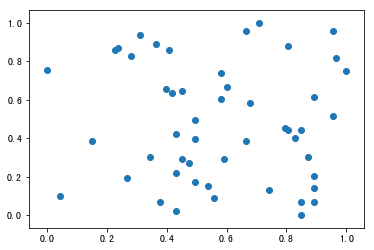

In [121]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [122]:
np.mean(X)

0.5295959595959596

In [123]:
np.std(X)

0.2820600652241419

### 均值方差归一化 Standardization

In [124]:
X2 = np.random.randint(0, 100, (50, 2))

In [125]:
X2 = np.array(X2, dtype=float)

In [126]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])

In [127]:
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])

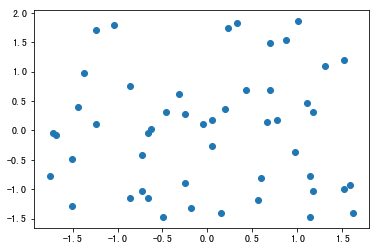

In [128]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [129]:
np.mean(X2[:, 0])

-1.1102230246251565e-16

In [130]:
np.std(X2[:, 0])

0.9999999999999998

In [131]:
np.mean(X2[:, 1])

7.993605777301127e-17

In [132]:
np.std(X2[:, 1])

1.0

## Scikit-learn中的Scaler

In [159]:
iris = datasets.load_iris()

In [160]:
X = iris.data
y = iris.target

In [161]:
X[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
standardScaler = StandardScaler()

In [165]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [166]:
standardScaler.mean_

array([5.8625    , 3.05982143, 3.79107143, 1.225     ])

In [167]:
# 标准差
standardScaler.scale_

array([0.80977565, 0.44208512, 1.74624871, 0.7532667 ])

In [168]:
standardScaler.transform(X_train)

array([[-1.06510982,  0.99568737, -1.25473045, -0.82971941],
       [ 0.66376409,  0.09088424,  0.97862839,  0.76334186],
       [-0.07718187, -1.04011967,  0.11964422, -0.03318878],
       [ 0.4167821 , -0.5877181 ,  0.57776911,  0.76334186],
       [-1.18860081, -1.49252123, -0.28121506, -0.29869899],
       [-0.94161883,  0.99568737, -1.36926167, -1.22798473],
       [ 0.04630912, -0.13531654,  0.74956595,  0.76334186],
       [ 1.03423707, -0.13531654,  0.69230034,  0.63058675],
       [-1.4355828 ,  0.31708502, -1.42652728, -1.36073984],
       [ 1.03423707, -1.26632045,  1.15042523,  0.76334186],
       [-0.07718187, -0.5877181 ,  0.74956595,  1.5598725 ],
       [ 1.03423707,  0.09088424,  0.5205035 ,  0.36507654],
       [ 0.66376409,  0.31708502,  0.86409717,  1.42711739],
       [ 0.5402731 ,  0.54328581,  1.26495645,  1.6926276 ],
       [ 0.66376409,  0.31708502,  0.40597228,  0.36507654],
       [-0.20067286, -0.36151732,  0.23417545,  0.09956633],
       [-0.44765485,  2.

In [169]:
X_train

array([[5. , 3.5, 1.6, 0.6],
       [6.4, 3.1, 5.5, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [5.1, 3.5, 1.4, 0.3],
       [5.9, 3. , 5.1, 1.8],
       [6.7, 3. , 5. , 1.7],
       [4.7, 3.2, 1.3, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.4, 3.2, 5.3, 2.3],
       [6.3, 3.3, 6. , 2.5],
       [6.4, 3.2, 4.5, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [6.7, 3.3, 5.7, 2.1],
       [4.6, 3.6, 1. , 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [4.9, 3. , 1.4, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [5.7, 2.8, 4.5, 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.5, 3. , 5.2, 2. ],
       [4.6, 3.1, 1.5, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [4.3, 3. , 1.1, 0.1],
       [5.5, 2.3, 4. , 1.3],
       [6.3, 2.5, 5. , 1.9],
       [5.4, 3

In [170]:
X_train = standardScaler.transform(X_train)

In [171]:
X_train

array([[-1.06510982,  0.99568737, -1.25473045, -0.82971941],
       [ 0.66376409,  0.09088424,  0.97862839,  0.76334186],
       [-0.07718187, -1.04011967,  0.11964422, -0.03318878],
       [ 0.4167821 , -0.5877181 ,  0.57776911,  0.76334186],
       [-1.18860081, -1.49252123, -0.28121506, -0.29869899],
       [-0.94161883,  0.99568737, -1.36926167, -1.22798473],
       [ 0.04630912, -0.13531654,  0.74956595,  0.76334186],
       [ 1.03423707, -0.13531654,  0.69230034,  0.63058675],
       [-1.4355828 ,  0.31708502, -1.42652728, -1.36073984],
       [ 1.03423707, -1.26632045,  1.15042523,  0.76334186],
       [-0.07718187, -0.5877181 ,  0.74956595,  1.5598725 ],
       [ 1.03423707,  0.09088424,  0.5205035 ,  0.36507654],
       [ 0.66376409,  0.31708502,  0.86409717,  1.42711739],
       [ 0.5402731 ,  0.54328581,  1.26495645,  1.6926276 ],
       [ 0.66376409,  0.31708502,  0.40597228,  0.36507654],
       [-0.20067286, -0.36151732,  0.23417545,  0.09956633],
       [-0.44765485,  2.

In [172]:
X_test = standardScaler.transform(X_test)

In [173]:
X_test

array([[ 2.14565602, -0.13531654,  1.60855012,  1.16160718],
       [-0.81812783,  2.35289206, -1.31199606, -1.49349494],
       [-0.94161883,  1.67428972, -1.31199606, -1.22798473],
       [ 1.65169204, -0.13531654,  1.15042523,  0.49783165],
       [ 2.26914701, -0.13531654,  1.32222206,  1.42711739],
       [-1.31209181, -0.13531654, -1.36926167, -1.22798473],
       [-0.94161883,  0.76948659, -1.31199606, -1.36073984],
       [-1.31209181,  0.76948659, -1.25473045, -1.36073984],
       [-0.20067286, -1.04011967, -0.16668383, -0.29869899],
       [ 0.29329111, -0.36151732,  0.5205035 ,  0.23232144],
       [ 0.16980012, -1.9449228 ,  0.11964422, -0.29869899],
       [-0.32416386, -0.13531654,  0.40597228,  0.36507654],
       [ 0.16980012, -0.36151732,  0.40597228,  0.36507654],
       [ 0.16980012, -0.81391889,  0.74956595,  0.49783165],
       [-0.57114585, -0.13531654,  0.40597228,  0.36507654],
       [-0.44765485, -1.26632045,  0.11964422,  0.09956633],
       [ 1.03423707, -0.

In [174]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [175]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [176]:
knn_clf.score(X_test, y_test)

0.8947368421052632